---
title: Activity 9.1
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [1]:
import pandas as pd
import numpy as np

from plotnine import *

In [2]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


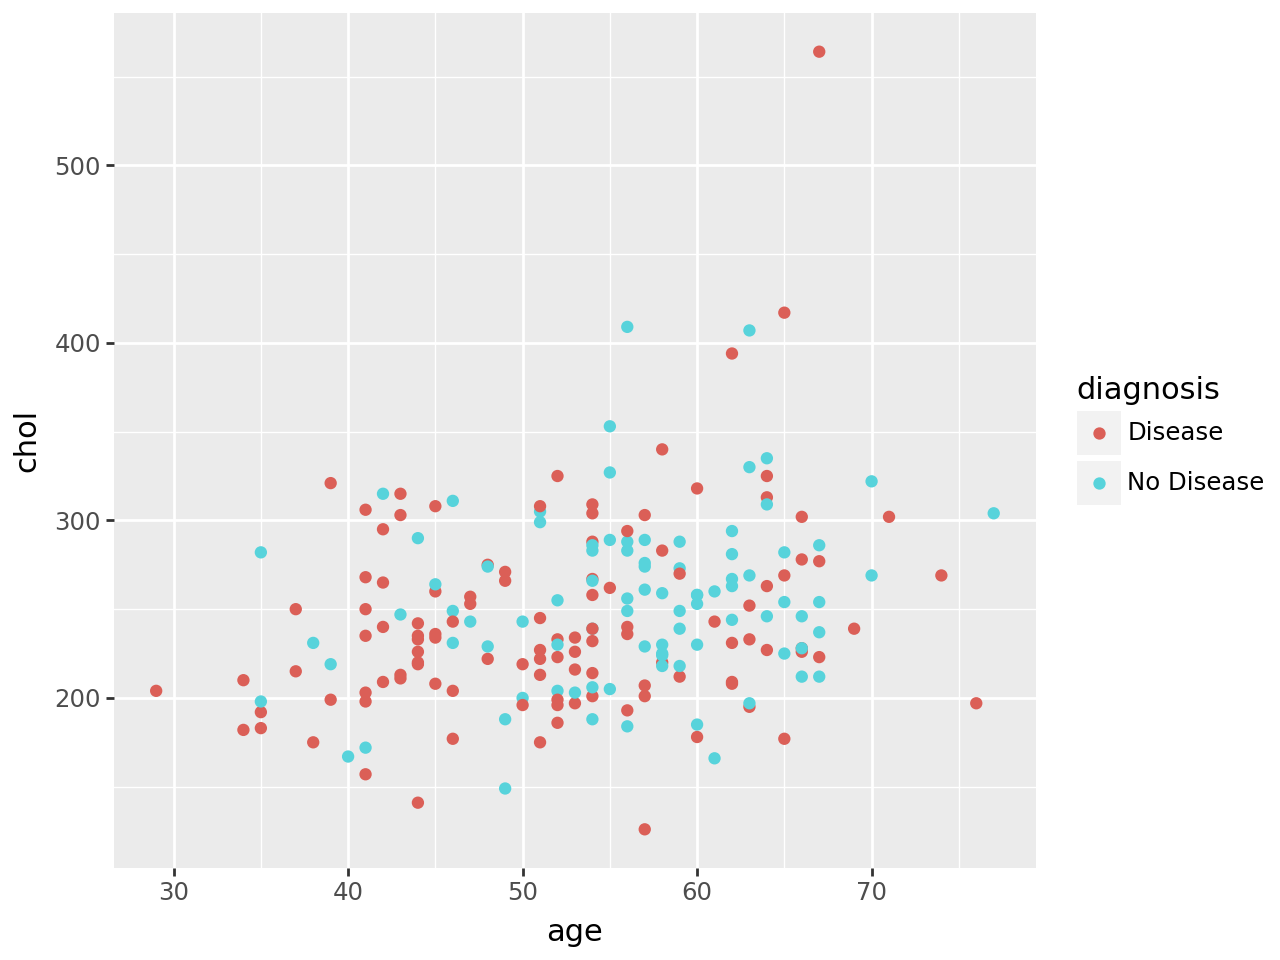

In [3]:
# Plotting the data to show disease or no disease outcomes when x = age and y = chol
(ggplot(df, aes(x="age", y="chol", color="diagnosis"))
+ geom_point())

In [4]:
# Finding basic descriptions for columns: age and chol
df[["age", "chol"]].describe()

,age,chol
count,204.000000,204.000000
mean,53.813725,248.377451
std,9.354781,53.176624
min,29.000000,126.000000
25%,46.000000,212.750000
50%,54.000000,241.000000
75%,61.000000,276.250000
max,77.000000,564.000000


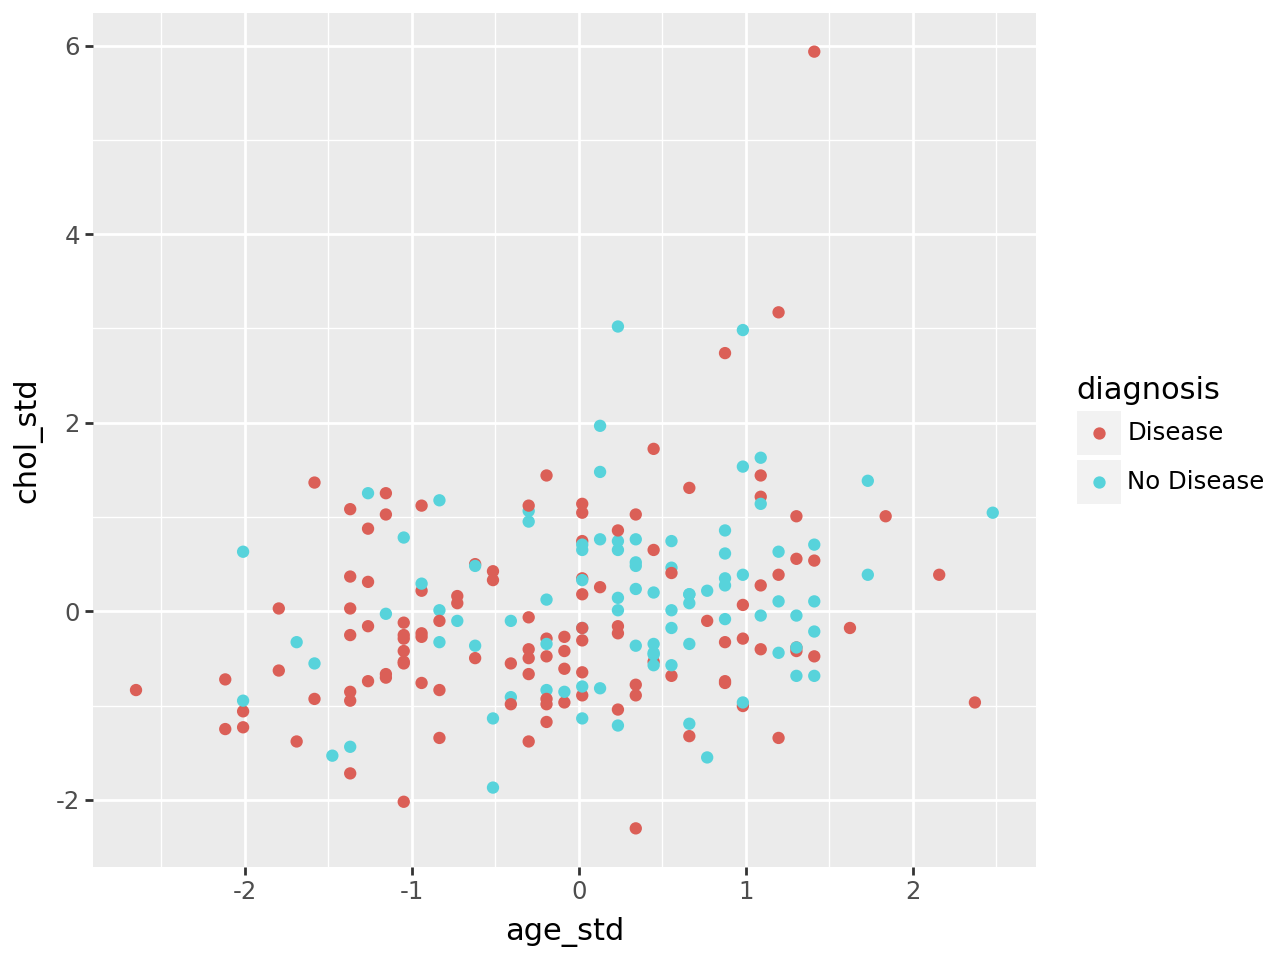

In [5]:
# Standardizing the age and chol variables and showing the standardized plot
df["age_std"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["chol_std"] = (df["chol"] - df["chol"].mean()) / df["chol"].std()

(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point())

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [6]:
# Fitting the logistic regression model using only age and chol as predictors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Defining variables
X = df[['age', 'chol']]
y = df['diagnosis']
# Creating the pipeline
logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)
# Fitting the model on the whole dataset
logistic_model_fitted = logistic_model.fit(X, y)
# Printing the fitted model
logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression())])

In [7]:
# Showing the coefficients and the intercept for this model
logistic_model_fitted.named_steps['logistic'].coef_, logistic_model_fitted.named_steps['logistic'].intercept_

(array([[0.42746115, 0.09597543]]), array([-0.27025982]))

In [8]:
# Printing each of the coefficients and the intercept for the logistic model
logistic_age_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][0]
logistic_chol_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][1]
logistic_intercept = logistic_model_fitted.named_steps['logistic'].intercept_

logistic_age_coef, logistic_chol_coef, logistic_intercept

(np.float64(0.42746115369956383),
 np.float64(0.09597542617159378),
 array([-0.27025982]))

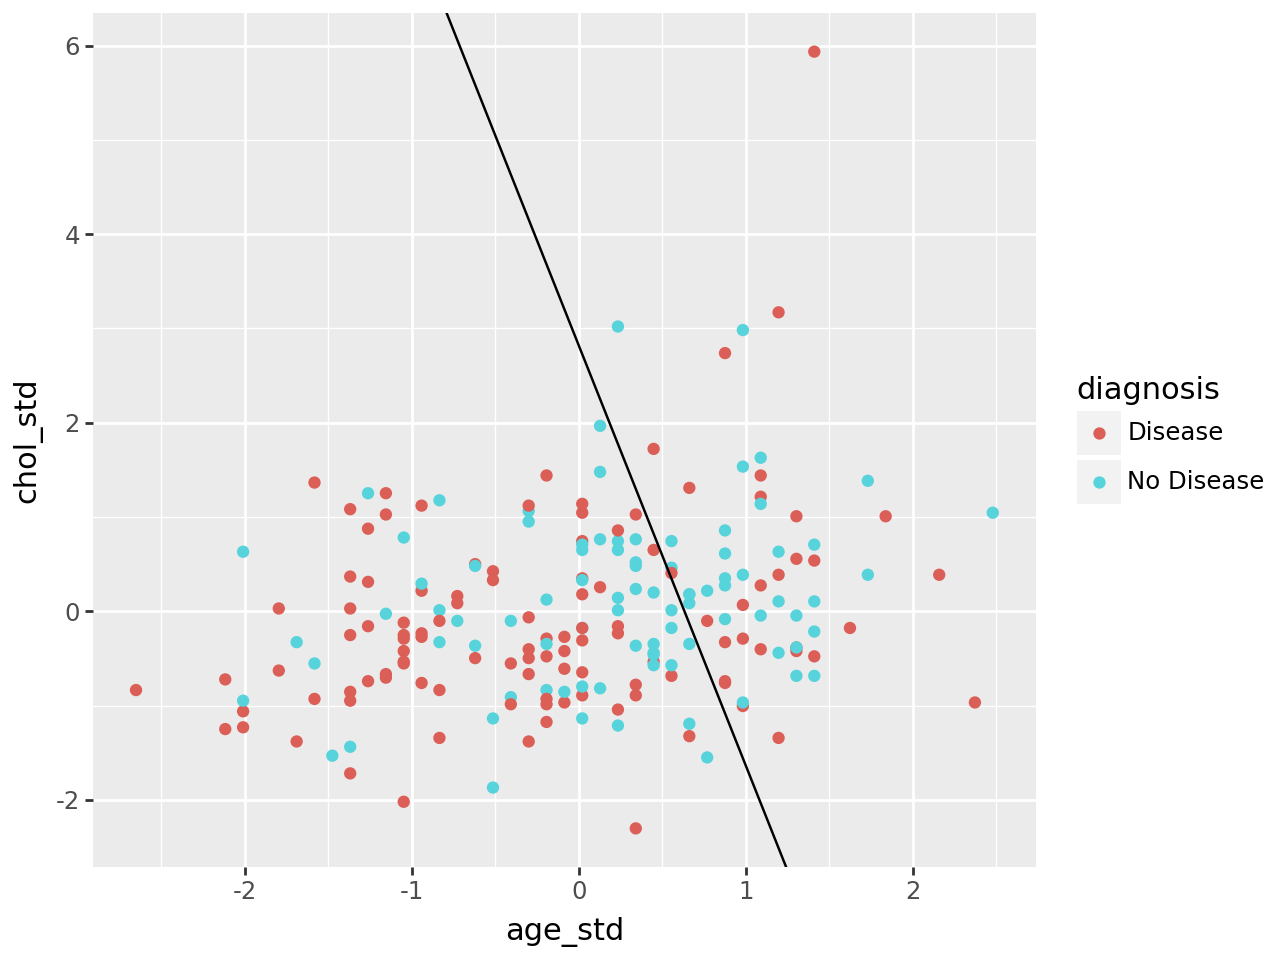

In [9]:
# Showing the plot and line for the logistic model. This is the decision boundary defined by the intercepts and slope.
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "black"))

In [10]:
# Using the logistic model to make predictions
logistic_predictions = logistic_model.predict(X)
logistic_predictions

array(['Disease', 'No Disease', 'No Disease', 'Disease', 'No Disease',
       'Disease', 'No Disease', 'No Disease', 'Disease', 'Disease',
       'Disease', 'Disease', 'Disease', 'Disease', 'No Disease',
       'No Disease', 'No Disease', 'Disease', 'Disease', 'No Disease',
       'Disease', 'No Disease', 'Disease', 'Disease', 'No Disease',
       'Disease', 'Disease', 'No Disease', 'Disease', 'Disease',
       'No Disease', 'Disease', 'No Disease', 'Disease', 'Disease',
       'Disease', 'Disease', 'Disease', 'Disease', 'No Disease',
       'No Disease', 'Disease', 'Disease', 'No Disease', 'Disease',
       'Disease', 'Disease', 'No Disease', 'No Disease', 'No Disease',
       'Disease', 'No Disease', 'No Disease', 'No Disease', 'Disease',
       'Disease', 'No Disease', 'Disease', 'No Disease', 'Disease',
       'Disease', 'Disease', 'Disease', 'Disease', 'Disease',
       'No Disease', 'Disease', 'Disease', 'No Disease', 'Disease',
       'Disease', 'Disease', 'Disease', 'Disease', 

In [11]:
# Printing the logisitic probabilities of the positive class (second column)
logistic_probs = logistic_model.predict_proba(X)[:, 1]
logistic_probs

array([0.4949661 , 0.5347142 , 0.53274896, 0.33921945, 0.59507195,
       0.32213031, 0.60766964, 0.58296884, 0.42371113, 0.26984598,
       0.30630847, 0.30296285, 0.31403244, 0.42767129, 0.62445333,
       0.56155306, 0.5466815 , 0.40948036, 0.43077408, 0.57768113,
       0.46983758, 0.56658817, 0.45785345, 0.35794553, 0.52180395,
       0.18434404, 0.32134066, 0.50536909, 0.36993798, 0.48518416,
       0.56244379, 0.34423264, 0.56941378, 0.4746545 , 0.41547946,
       0.48142611, 0.26163123, 0.49334324, 0.33261469, 0.64665907,
       0.52822143, 0.48730046, 0.44323732, 0.60070622, 0.37007195,
       0.22547173, 0.32993633, 0.51348655, 0.50296397, 0.51229532,
       0.36031174, 0.50160704, 0.51997661, 0.50763031, 0.39325934,
       0.31623295, 0.56244379, 0.34232281, 0.66634969, 0.46024261,
       0.38027047, 0.47541355, 0.36086141, 0.40584644, 0.42883876,
       0.53455005, 0.46758484, 0.44768568, 0.63349352, 0.47539235,
       0.2792142 , 0.40004961, 0.31858495, 0.37798574, 0.43077

In [12]:
# Computing the logit (log-odds) for each observation
logistic_scores = logistic_intercept + logistic_age_coef * df['age_std'] + logistic_chol_coef * df['chol_std']
logistic_scores

,0
0,-0.020750
1,0.138076
2,0.130199
3,-0.665801
4,0.383365
...,...
199,-0.294343
200,-0.437414
201,-0.725935
202,-1.247938


In [13]:
# Adding these columns into the dataframe
df["logistic_prediction"] = logistic_predictions
df["logistic_prob"] = logistic_probs
df["logistic_score"] = logistic_scores

df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,age_std,chol_std,logistic_prediction,logistic_prob,logistic_score
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0.661295,-0.345593,Disease,0.494966,-0.020750
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,0.661295,1.309270,No Disease,0.534714,0.138076
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0.875090,0.274981,No Disease,0.532749,0.130199
3,Mikaila Block,43,1,1,115,303,1,181,Disease,-1.155957,1.027191,Disease,0.339219,-0.665801
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1.302679,1.008386,No Disease,0.595072,0.383365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0.126809,-0.815724,Disease,0.426926,-0.294343
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,-0.300779,-0.402008,Disease,0.392259,-0.437414
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,-1.262854,0.876749,Disease,0.325841,-0.725935
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,-2.011135,-1.229440,Disease,0.222641,-1.247938


In [14]:
# Creating a cross-tabulation
pd.crosstab(df["logistic_prediction"], df["diagnosis"])

diagnosis,Disease,No Disease
logistic_prediction,,
Disease,86,57
No Disease,29,32


In [15]:
# Making a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logistic_predictions)

array([[86, 29],
       [57, 32]])

In [25]:

# Getting parts from the pipeline
scaler = logistic_model_fitted.named_steps['standardize']
logit  = logistic_model_fitted.named_steps['logistic']

# Finding the coefficients for age and chol betas
b0 = float(logit.intercept_)
b_age, b_chol = logit.coef_[0]

# Finding the scaled means for both age and chol
age_mean, chol_mean = scaler.mean_
age_scale, chol_scale = scaler.scale_

# Standardizing age 55 because everything else is standardized
age_std_55 = (55 - age_mean) / age_scale

# Stating the probabilities for this problem
p50 = 0.5
p90 = 0.9

# Finding the logits for those probabilities
logit50 = np.log(p50 / (1 - p50))
logit90 = np.log(p90 / (1 - p90))

# Solving for cholesterol in standardized form
chol_std_50 = (logit50 - b0 - b_age * age_std_55) / b_chol
chol_std_90 = (logit90 - b0 - b_age * age_std_55) / b_chol

# Converting back to actual cholesterol units
chol_50 = chol_mean + chol_std_50 * chol_scale
chol_90 = chol_mean + chol_std_90 * chol_scale


print(chol_50, chol_90)


Cholesterol for 50% probability: 367.71778753271246
Cholesterol for 90% probability: 1582.1355182254888


/tmp/ipython-input-760185666.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


Cholesterol for 50% probability is 367.71. Cholesterol for 90% probability is 1582.14.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [27]:
# Showing the coefficients and the intercept for this model
lda_model_fitted.named_steps['lda'].coef_, lda_model_fitted.named_steps['lda'].intercept_

(array([[0.43446582, 0.09493491]]), array([-0.26973565]))

In [29]:
# Printing each of the coefficients and the intercept for the lda model
lda_age_coef = lda_model_fitted.named_steps['lda'].coef_[0][0]
lda_chol_coef = lda_model_fitted.named_steps['lda'].coef_[0][1]
lda_intercept = lda_model_fitted.named_steps['lda'].intercept_

lda_age_coef, lda_chol_coef, lda_intercept

(np.float64(0.4344658185163842),
 np.float64(0.09493491278066943),
 array([-0.26973565]))

In [31]:
age = 55
ldachol_50 = -(lda_intercept + lda_age_coef * age) / lda_chol_coef

print(ldachol_50)


[-248.86402352]


For a 55 year old, cholesterol would need to be 248.86 for the doctors to predict heart disease is present.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df[['age', 'chol']]
y = df['diagnosis']

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

SVC(C=10, kernel='linear', probability=True)

In [33]:
svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

svc_age_coef, svc_chol_coef, svc_intercept

(np.float64(0.6009556681731714),
 np.float64(0.19360163718551782),
 np.float64(-0.31134523984506396))

In [34]:
age = 55
svcchol_50 = -(svc_intercept + svc_age_coef * age) / svc_chol_coef

print(svcchol_50)

-169.1164237330558


For a 55 year old, cholesterol would need to be 169.12 for the doctors to predict heart disease is present.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

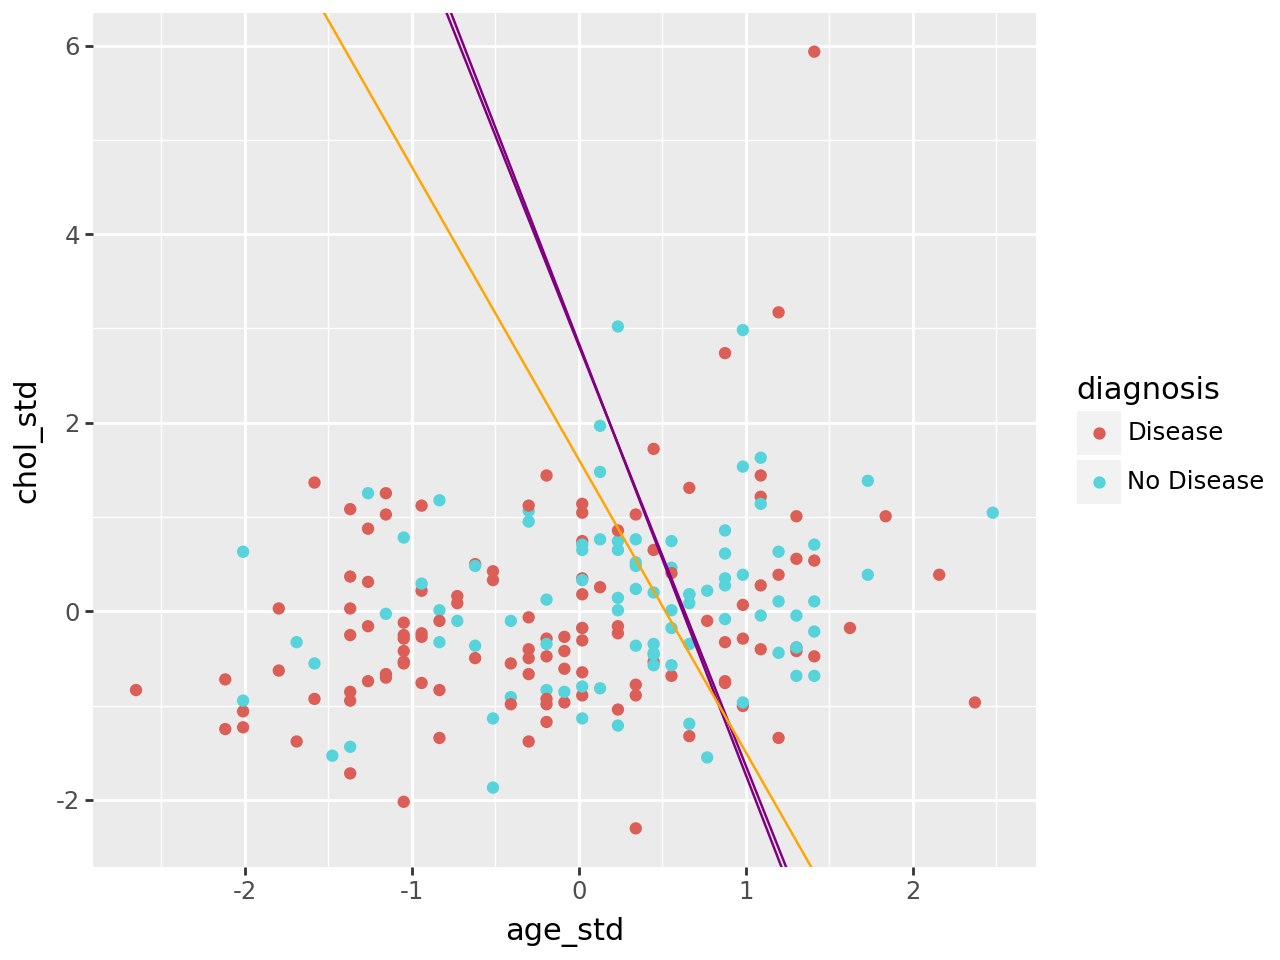

In [35]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "purple")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange"))